In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('../8.1 DATA/train (1).csv',usecols=['Age','Fare','Survived'])

In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
# Here there are 177 missing value in Age column

In [7]:
# Filling missing value
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\godsc\AppData\Local\Temp\ipykernel_14344\3246790620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [8]:
df.sample(5)

,Survived,Age,Fare
774,1,54.000000,23.0000
618,1,4.000000,39.0000
263,0,40.000000,0.0000
738,0,29.699118,7.8958
170,0,61.000000,33.5000


In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
# Now there is no missing value

In [11]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

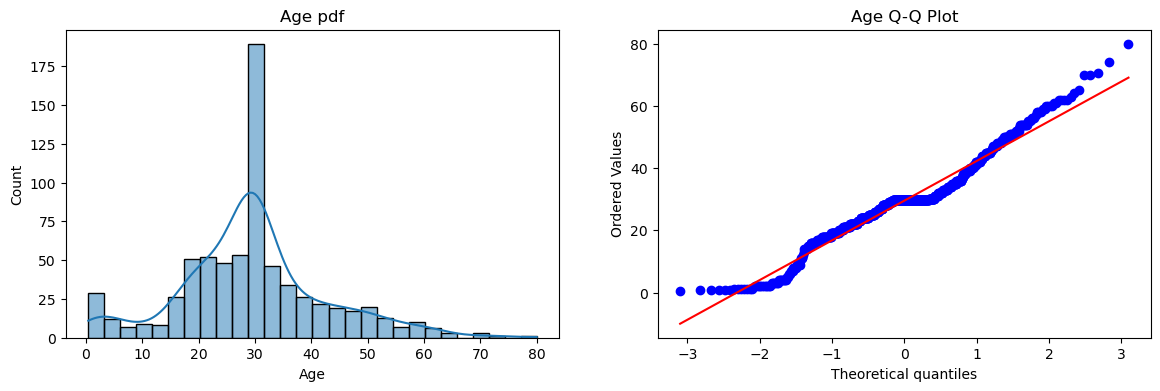

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'],kde=True)
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age Q-Q Plot')

plt.show()

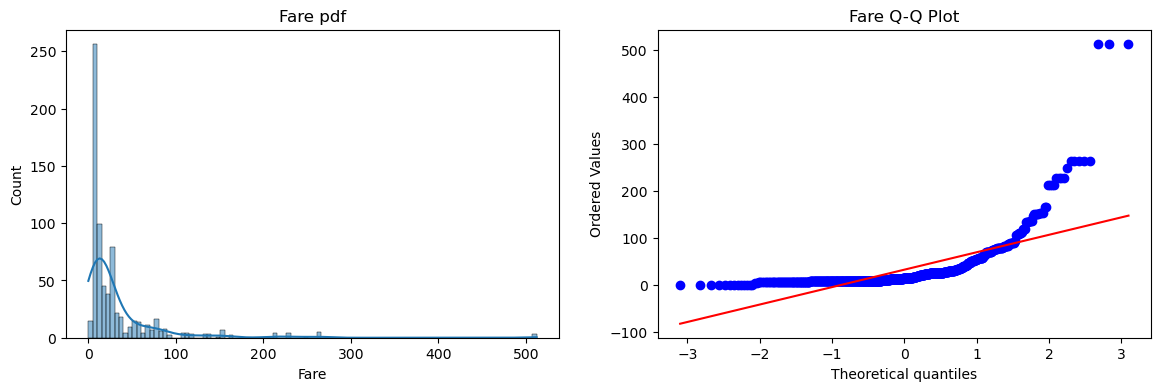

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'],kde=True)
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare Q-Q Plot')

plt.show()

In [15]:
# Training Without Using transformers
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [16]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Accuracy LR :",accuracy_score(y_test,y_pred1))
print("Accuracy DT :",accuracy_score(y_test,y_pred2))

Accuracy LR : 0.6480446927374302
Accuracy DT : 0.664804469273743


In [17]:
# Trainig with Transform
trf = FunctionTransformer(func=np.log1p)

In [18]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [19]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [20]:
clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred1 = clf1.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

In [21]:
print("Accuracy LR :",accuracy_score(y_test,y_pred1))
print("Accuracy DT :",accuracy_score(y_test,y_pred2))

Accuracy LR : 0.6815642458100558
Accuracy DT : 0.664804469273743


In [22]:
# Here the accuracy for LR increases using transform
# As we know DT,does not get affected by transformers

In [23]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf1,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6656179775280899


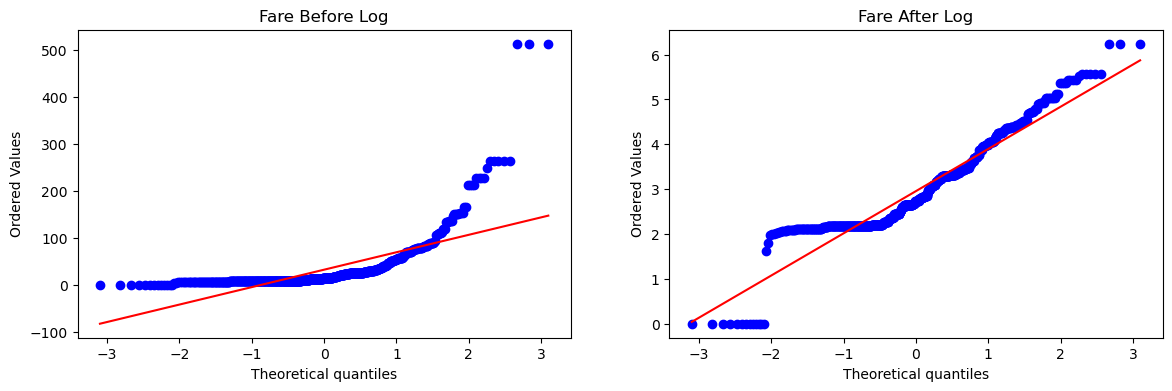

In [24]:
# Q_Q plot Before VS After Transformation
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare After Log')

plt.show()

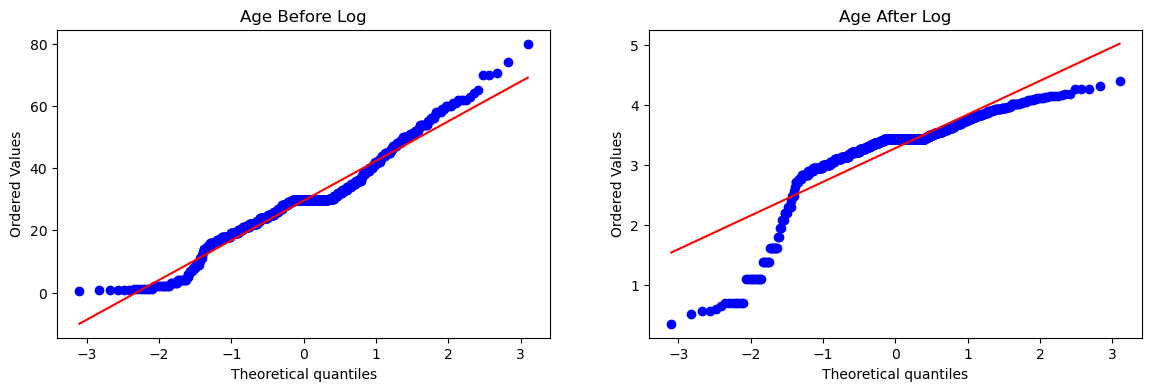

In [25]:
# Q_Q plot Before VS After Transformation
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age After Log')

plt.show()

In [26]:
# Results on Fare is good but on Age is bad

In [27]:
# Lets apply log transform on fare only
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [28]:
x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)

In [29]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [30]:
clf1.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred1 = clf1.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

In [31]:
print("Accuracy LR :",accuracy_score(y_test,y_pred1))
print("Accuracy DT :",accuracy_score(y_test,y_pred2))

Accuracy LR : 0.6703910614525139
Accuracy DT : 0.664804469273743


In [32]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf1,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6566042446941323


In [33]:
# Rest of transformers - Reciprocal , Square ,SquareRoot
def apply_transform(transform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    x_trans = trf.fit_transform(x)
    
    clf = LogisticRegression()
    
    print("Accuracy LR : ",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x_train['Fare'],dist="norm",plot=plt)
    plt.title('Fare Before Log')

    plt.subplot(122)
    stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
    plt.title('Fare After Log')

    plt.show()


Accuracy LR :  0.6589013732833957


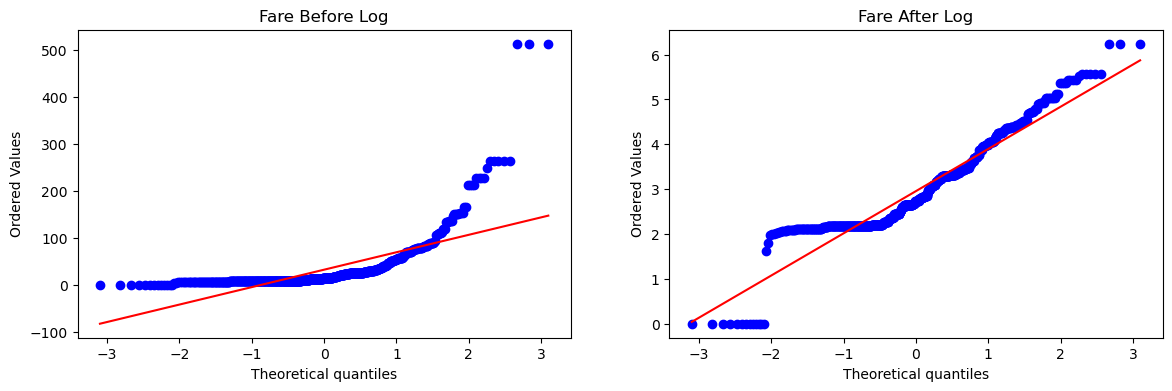

In [34]:
# Sends Nothing
apply_transform(lambda x:x)

Accuracy LR :  0.6431335830212235


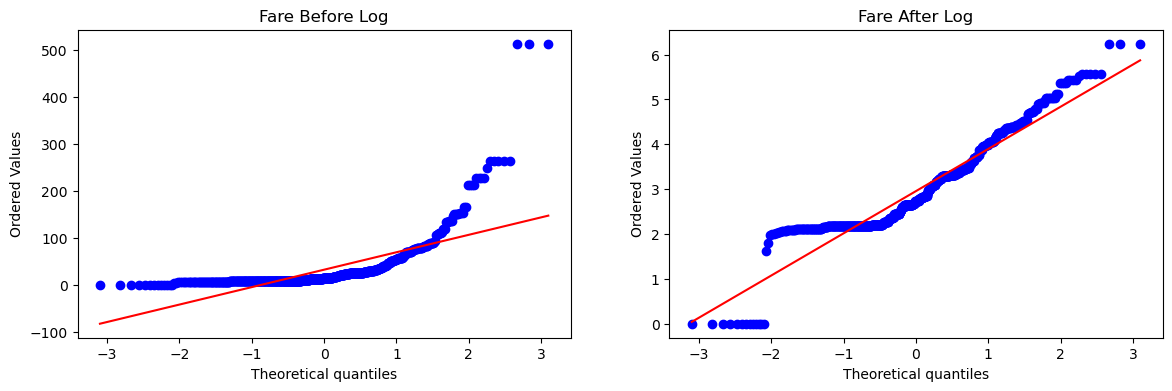

In [35]:
# Square transform
apply_transform(lambda x:x**2)

Accuracy LR :  0.6589013732833957


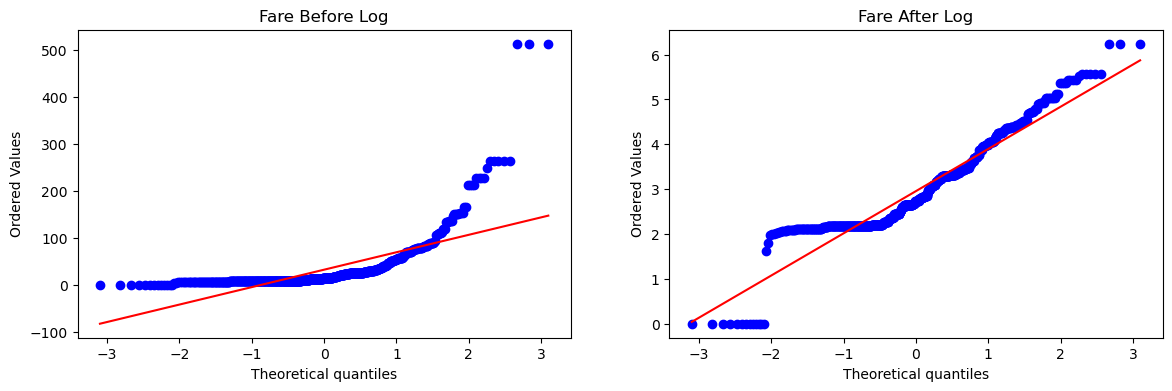

In [36]:
# Square Root transform
apply_transform(lambda x:x**1/2)

Accuracy LR :  0.61729088639201


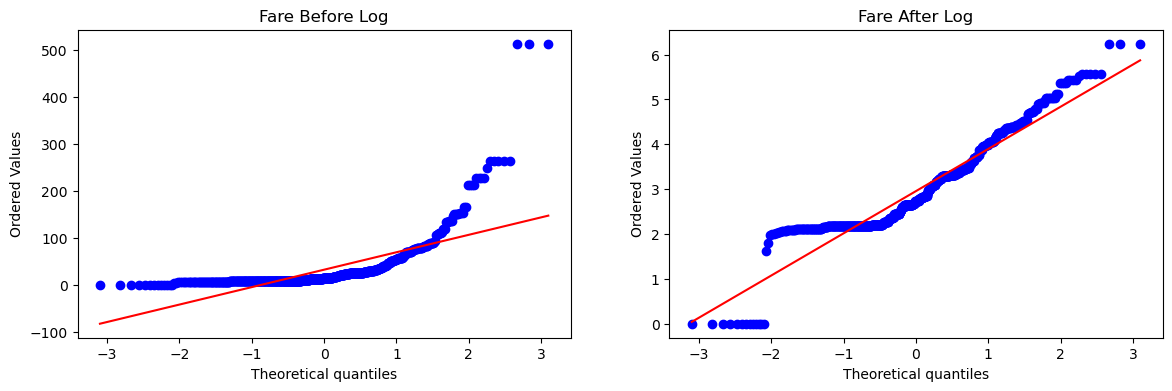

In [37]:
# Reciprocal transform
apply_transform(lambda x: 1/(x+0.1))